In [1]:
%matplotlib notebook

import os
import time
import numpy as np
import matplotlib as mpl

from collections import OrderedDict
from importlib import reload
from matplotlib import pyplot as plt

from labtools import mplplots; reload(mplplots)
from labtools.mplplots.init_nb_plotting import *
from labtools.mplplots import tools as mpltools

import qcodes as qc
from qcodes.dataset.measurements import Measurement
from qcodes.dataset.plotting import plot_by_id
from qcodes.dataset.data_set import DataSet
from qcodes.sweep import sweep, nest, chain, szip, getter, setter, time_trace
#from qcodes.sweep.sweep import ParameterSweep, Nest, ParameterWrapper, FunctionWrapper, FunctionSweep, getter
from pytopo.qctools import instruments as instools
import utils
from v2_dataset_tools.experiments import do_experiment, get_results_from_db_path
from qcodes.dataset.data_export import get_shaped_data_by_runid

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
m = 9.11e-31
h = 6.623e-34
h_bar = h/(2*np.pi)
e = 1.602e-19
E_F = 100e-3*e #J
m_eff = 0.023*m

v_F = np.sqrt(2*E_F/m_eff)

In [3]:
from utils.utils import dic_data
from utils.utils.dic_data import dic2hdf5, data
import scipy.optimize as spy

In [4]:
dat = dic2hdf5.load_dict_from_hdf5('D:\\data\\20180430\\20180430_001.hdf5')

In [5]:
dat1 = dic2hdf5.load_dict_from_hdf5('D:\\data\\20180503\\20180503_006.hdf5')

In [6]:
dat2 = dic2hdf5.load_dict_from_hdf5('D:\\data\\20180502\\20180502_014.hdf5')

In [7]:
dat3 = dic2hdf5.load_dict_from_hdf5('D:\\data\\20180503\\20180503_001.hdf5')

In [8]:
dat4 = dic2hdf5.load_dict_from_hdf5('D:\\data\\20180503\\20180503_002.hdf5')

In [9]:
dat5 = dic2hdf5.load_dict_from_hdf5('D:\\data\\20180503\\20180503_003.hdf5')

In [4]:
dat1 = get_shaped_data_by_runid(234)

In [287]:
dat1 = get_results_from_db_path('WAL_0deg_80nm_m0m0/0')

In [11]:
dat1[0]

[{'data': array([-3.5 , -3.45, -3.4 , -3.35, -3.3 , -3.25, -3.2 , -3.15, -3.1 ,
         -3.05, -3.  , -2.95, -2.9 , -2.85, -2.8 , -2.75, -2.7 , -2.65,
         -2.6 , -2.55, -2.5 , -2.45, -2.4 , -2.35, -2.3 , -2.25, -2.2 ,
         -2.15, -2.1 , -2.05, -2.  , -1.95, -1.9 , -1.85, -1.8 , -1.75,
         -1.7 , -1.65, -1.6 , -1.55, -1.5 , -1.45, -1.4 , -1.35, -1.3 ,
         -1.25, -1.2 , -1.15, -1.1 , -1.05, -1.  , -0.95, -0.9 , -0.85,
         -0.8 , -0.75, -0.7 , -0.65, -0.6 , -0.55, -0.5 , -0.45, -0.4 ,
         -0.35, -0.3 , -0.25, -0.2 , -0.15, -0.1 , -0.05,  0.  ]),
  'label': '',
  'name': 'gate_voltage',
  'unit': 'V'},
 {'data': array([-1.5 , -1.45, -1.4 , -1.35, -1.3 , -1.25, -1.2 , -1.15, -1.1 ,
         -1.05, -1.  , -0.95, -0.9 , -0.85, -0.8 , -0.75, -0.7 , -0.65,
         -0.6 , -0.55, -0.5 , -0.45, -0.4 , -0.35, -0.3 , -0.25, -0.2 ,
         -0.15, -0.1 , -0.05,  0.  ,  0.05,  0.1 ,  0.15,  0.2 ,  0.25,
          0.3 ,  0.35,  0.4 ,  0.45,  0.5 ,  0.55,  0.6 ,  0.65,  0.

In [288]:
from utils.utils.dic_data import dic2hdf5, data
dat = data.init_dic_data('WAL_0deg_80nm_m0m0') #device name
#dat['data'] = {'gate1': np.array(result[1].get_data('yoko1_voltage')), 'gate2': np.array(result[1].get_data('yoko2_voltage')), 'current': np.array(result[1].get_data('current')), 'current_lockin':np.array(result[1].get_data('L1X'))}
dat['data'] = dict(zip(dat1.parameters.split(","), np.array([dat1.get_values(dat1.parameters.split(",")[i]) for i in range(len(dat1.parameters.split(",")))])))
dic2hdf5.save_dict_to_hdf5(dat, dat['filepath'])

### 1D plot

In [5]:
def plot1D(data, x, y):
    plt.figure(data['name'])
    plt.title(data['filepath'])
    data = data['data']
    G = data[y]/10e-3
    plt.plot(data[x], data[y])
    plt.xlabel(x+' (T)')
    plt.ylabel(y+' (A)')

In [118]:
np.polyfit?

In [10]:
def curr2cond(data, x, y, r_line, b_max):
    '''
    Convert current into conductance and subtract line resistance. b_max to plot only values between +-b_max.
    '''
    plt.figure(data['name'])
    plt.title(data['filepath'])
    data = data['data']
    #g_line = 1/r_line
    I = data[y]
    r = 10e-3/I
    g = (1/(r-r_line))/(e**2/h)
    #g = data[y]/10e-3
    #g = (g*g_line/(g+g_line))/(e**2/h)  #G0 with 2 or not
    b = data[x]
    selector = (data[x]<0.025) * (data[x]> -0.038)
    
    b_pol = data[x][selector]
    g_pol = g[selector]
    a2,a1,a0 = ps =  np.polyfit(b_pol, g_pol, 2)
    x_shift = -a1/2/a2
    y_max = a1**2/4/a2-a1**2/2/a2+a0
    print(x_shift, y_max)
    plt.subplot(211)
    plt.plot(b, g)
    plt.plot(b_pol, np.polyval(ps, b_pol))
    plt.ylabel(r'G ($e^2/h$)')
    plt.subplot(212)
    b_sub = b-x_shift
    g_sub = g-y_max
    data_selector = np.abs(b_sub)<b_max
    plt.plot(b_sub[data_selector], g_sub[data_selector])
    plt.xlabel('X_field (T)')
    plt.ylabel(r'$(G - G_\mathrm{max})/e^2/h$')
    plt.tight_layout()
    
    return b_sub[data_selector], g_sub[data_selector]

<IPython.core.display.Javascript object>


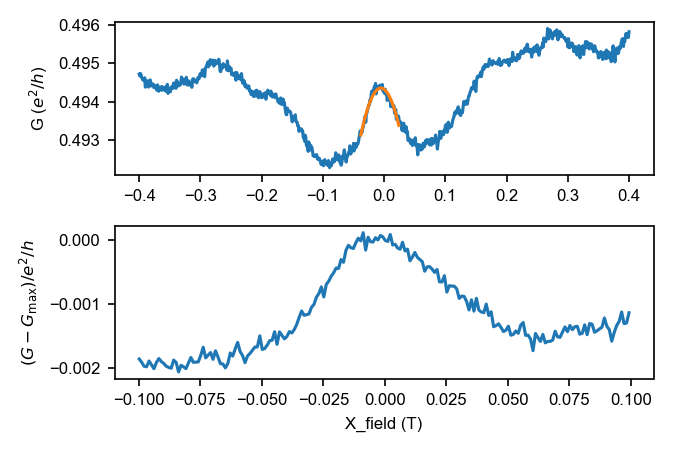

-0.005217325680964289 0.49435373636197333


In [11]:
B_sub1, G_sub1 = curr2cond(dat1, 'AMI430_x_field', 'current_2', 13.4e3, 0.1)

<IPython.core.display.Javascript object>


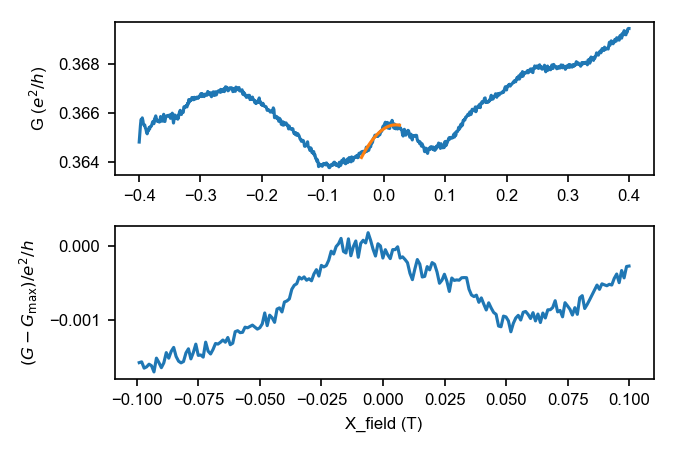

0.019049833890193348 0.36550866669693005


In [12]:
B_sub2, G_sub2 = curr2cond(dat2, 'AMI430_x_field', 'current_2', 13.4e3, 0.1)

<IPython.core.display.Javascript object>


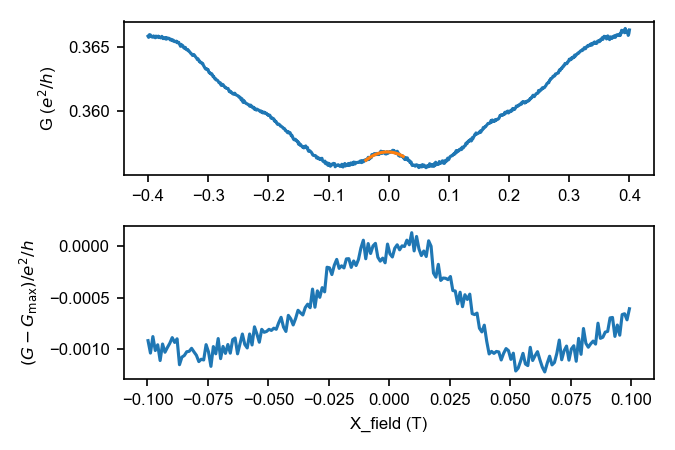

-0.0022228303251332618 0.35683034417216364


In [13]:
B_sub3, G_sub3 = curr2cond(dat3, 'AMI430_x_field', 'current_2', 13.4e3, 0.1)

<IPython.core.display.Javascript object>


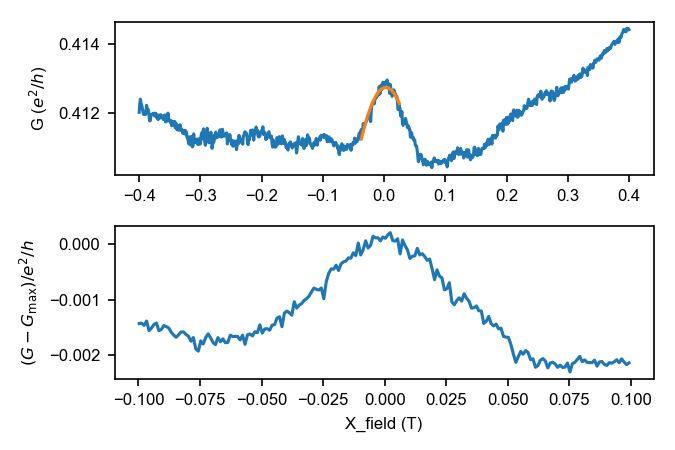

0.002688638663538986 0.4127429652387526


In [14]:
B_sub4, G_sub4 = curr2cond(dat4, 'AMI430_x_field', 'current_2', 13.4e3, 0.1)

<IPython.core.display.Javascript object>


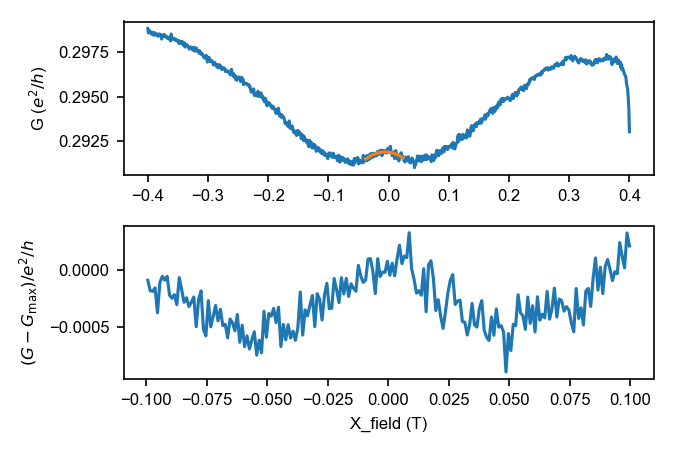

-0.005723300098398988 0.2918727504402874


In [15]:
B_sub5, G_sub5 = curr2cond(dat5, 'AMI430_x_field', 'current_2', 13.4e3, 0.1)

<IPython.core.display.Javascript object>


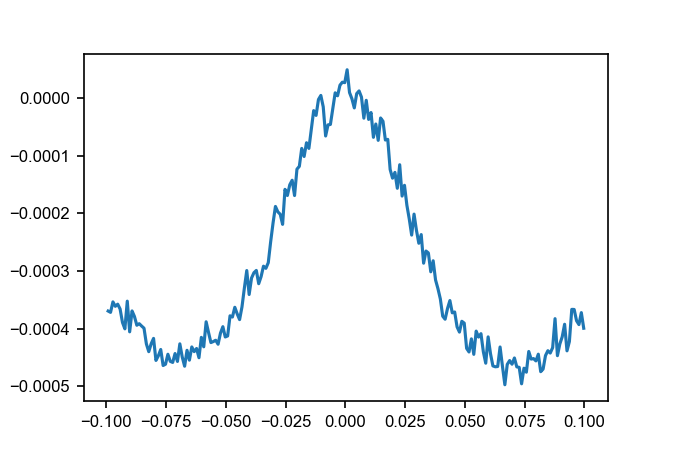

In [50]:
plt.figure()
plt.plot(B_sub,G_sub)

<IPython.core.display.Javascript object>


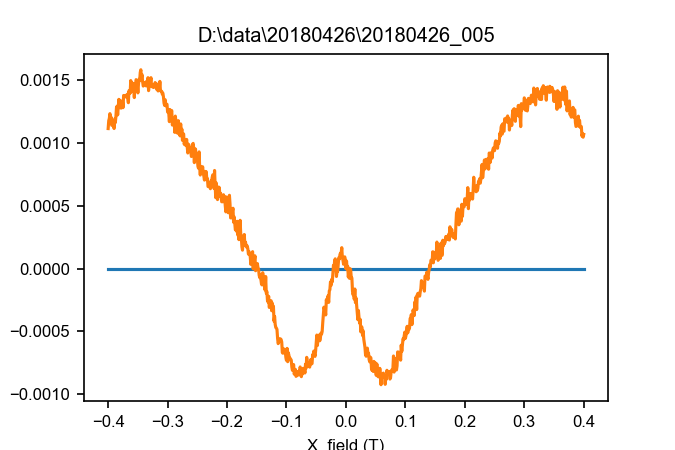

In [6]:
plot1D(dat1, 'AMI430_x_field', 'current')

<IPython.core.display.Javascript object>


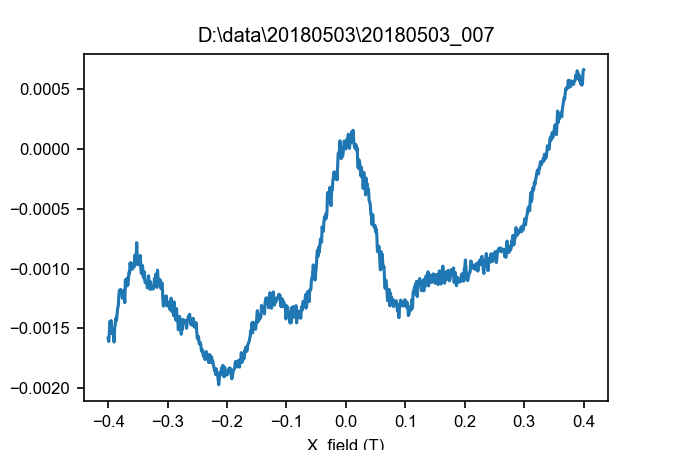

In [132]:
B10, G10 = curr2cond(dat1, 'AMI430_x_field', 'current_2', 15e3, 0.5)

### 2D plot

In [215]:
def colorplot(data, fast_s, slow_s, z):
    fig=plt.figure(data['name'])
    plt.title(data['filepath'])
    data = data['data']
    cmap = plt.cm.viridis
    norm = mpl.colors.Normalize(vmin=min(data[z]), vmax=max(data[z]))
    sm = plt.cm.ScalarMappable(cmap=cmap,norm=norm)
    sm.set_array([])
    cbar = plt.colorbar(sm)
    cbar.ax.set_ylabel(z)
    plt.contourf(np.unique(data[fast_s])[::-1], np.unique(data[slow_s])[::-1], np.reshape(data[z],(len(np.unique(data[slow_s])),len(np.unique(data[fast_s])))),150)
    plt.xlabel(fast_s)
    plt.ylabel(slow_s)

In [ ]:
colorplot(dat1, 'AMI430_x_field', 'yoko2_voltage', 'current_1')

### 1D plot from 2D scan

In [22]:
def plot1D_from_2D(data, x, y, x2, x2_value):
    #plt.figure(data['name'])
    plt.title(data['filepath'])
    data = data['data']
    points = data[x2] == x2_value
    r_line = 15e3
    I = data[y][points]
    r = 10e-3/I
    g_sub = (1/(r-r_line))/(e**2/h)
    b = data[x][points]
    data_selector = np.abs(b)<0.1
    g_sub = g_sub[data_selector]
    g_sub-=max(g_sub)
    b_sub = b[data_selector]
    plt.plot(b_sub, g_sub, label=x2+' = '+str(x2_value))
    #plt.xlabel(x+' (B)')
    #plt.ylabel(y+' (A)')
    #plt.legend()
    return b_sub, g_sub

<IPython.core.display.Javascript object>


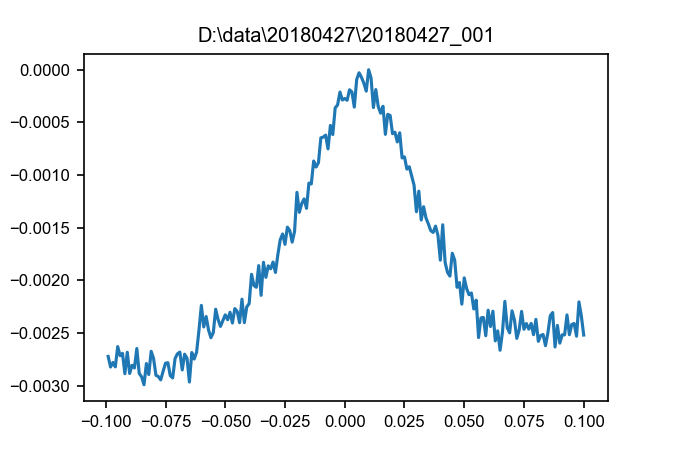

In [23]:
plt.figure()
B_sub,G_sub = plot1D_from_2D(dat, 'AMI430_x_field', 'current', 'yoko1_voltage', -1)

<IPython.core.display.Javascript object>


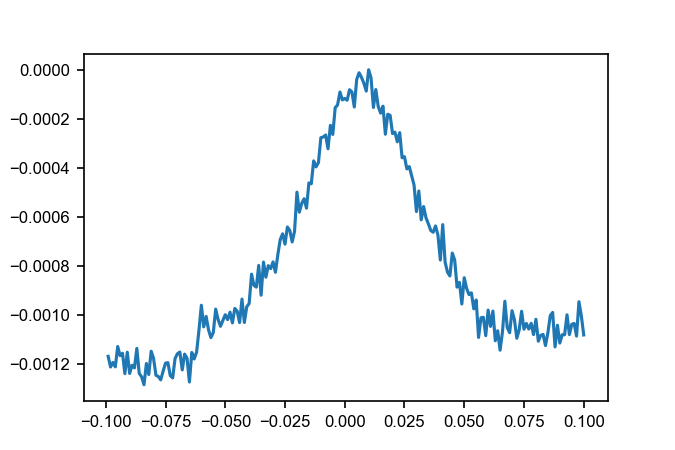

In [303]:
plt.figure()
plt.plot(B_sub,G_sub)

In [5]:
def curr2cond_2D(data, x, y, r_line, b_max, x2, x2_value, off = 0):
    '''
    Convert current into conductance and subtract line resistance. b_max to plot only values between +-b_max.
    '''
    #plt.figure(data['name'])
    plt.title(data['filepath'])
    data = data['data']
    points = data[x2] == x2_value
    I = data[y][points]
    r = 10e-3/I
    g_sub = (1/(r-r_line))/(e**2/h)
    b = np.unique(data[x])
    selector = (b<0.038) * (b> -0.038)
    
    b_pol = b[selector]
    g_pol = g_sub[selector]
    a2,a1,a0 = ps =  np.polyfit(b_pol, g_pol, 2)
    x_shift = -a1/2/a2
    y_max = a1**2/4/a2-a1**2/2/a2+a0
    print(x_shift, y_max)
    #plt.subplot(211)
    #plt.plot(b, g_sub)
    #plt.plot(b_pol, np.polyval(ps, b_pol))
    plt.ylabel(r'G ($e^2/h$)')
    #plt.subplot(212)
    b_sub = b-x_shift
    g_sub = g_sub-y_max
    data_selector = np.abs(b_sub)<b_max
    plt.plot(b_sub[data_selector], g_sub[data_selector], label=x2+' = '+str(x2_value))
    plt.xlabel('X_field (T)')
    plt.ylabel(r'$(G - G_\mathrm{max})/e^2/h$')
    plt.legend(ncol=3, fontsize='x-small')
    #plt.tight_layout()
    
    return b_sub[data_selector], g_sub[data_selector]

<IPython.core.display.Javascript object>


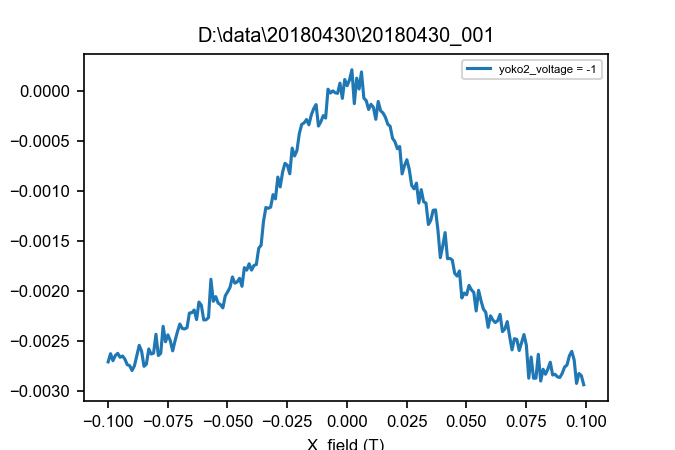

0.0038595620752783135 0.44990565139049493


In [6]:
plt.figure()
B_sub, G_sub = curr2cond_2D(dat, 'AMI430_x_field', 'current', 15e3, 0.1, 'yoko2_voltage', -1)

<IPython.core.display.Javascript object>


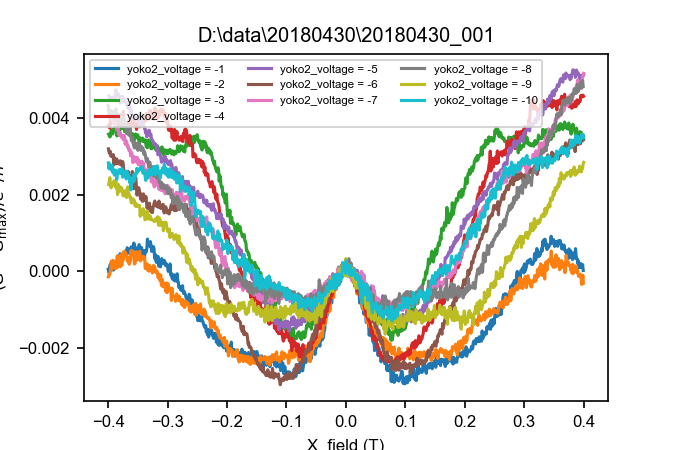

0.0038595620752783135 0.44990565139049493
0.004633026253335448 0.42545120130442066
0.0031578652769767165 0.4017983246260338
0.00024567752554576226 0.38530610480978644
0.0011033991620291678 0.36637143899020347
0.0044695837207165325 0.3520782134143334
0.006246840107287657 0.3353078171132373
0.0019470703699014458 0.3228189244134884
0.004036293479786414 0.3132326699052053
0.0015132603105091687 0.3008658030815101


In [72]:
plt.figure()
for a in [-1,-2,-3,-4,-5, -6,-7,-8,-9,-10]:    
    curr2cond_2D(dat, 'AMI430_x_field', 'current', 15e3, 0.4, 'yoko2_voltage', a)
#plt.plot(B10,G10)

### Clean formula

In [20]:
def DG_clean(B_sub, l_so, l_phi, l_e, D):
    #D = 0.012
    C1 = 19/2
    C2 = 24/5
    B_sub[B_sub==0] = 1e-9
    w = 100e-9
    L = 8e-6
    #D = v_F*l_e
    l_m = np.sqrt(h_bar/e*abs(B_sub))
    tau_b = C1*l_m**4*l_e/(w**3*D) + C2*l_m**2*l_e**2/(w**2*D)
    return -2*e**2/h/L*(3/2*(1/l_phi**2 + 4/3/l_so**2 + 1/D/tau_b)**(-0.5) - 0.5*(1/l_phi**2 + 1/D/tau_b)**(-0.5) -
                           3/2*(1/l_phi**2 + 1/l_e**2 + 4/3/l_so**2 + 1/D/tau_b)**(-0.5) + 0.5*(1/l_phi**2 + 1/l_e**2 + 1/D/tau_b)**(-0.5))

In [89]:
def DG_clean(B_sub, l_so, l_phi, l_e, D):
    #D = 0.012
    C1 = 19/2
    C2 = 24/5
    B_sub[B_sub==0] = 1e-9
    w = 100e-9
    L = 8e-6
    #D = v_F*l_e
    l_m = np.sqrt(h_bar/e/abs(B_sub))
    tau_b = C1*l_m**4*l_e/(w**3*D) + C2*l_m**2*l_e**2/(w**2*D)
    g = -1/L*(3/2*(1/l_phi**2 + 4/3/l_so**2 + 1/D/tau_b)**(-0.5) - 0.5*(1/l_phi**2 + 1/D/tau_b)**(-0.5) -
                           3/2*(l_phi**2 + 1/l_e**2 + 4/3/l_so**2 + 1/D/tau_b)**(-0.5) + 0.5*(1/l_phi**2 + 1/l_e**2 + 1/D/tau_b)**(-0.5))
    g-=max(g)
    return g

In [90]:
a,b = spy.curve_fit(DG_clean, B_sub, G_sub, maxfev=1000000, ftol=1e-9, xtol=1e-9, p0=[10e-9,1e-6, 1e-9, 0.012],
                   method='trf',x_scale='jac', bounds=(1e-12,100)) #,,x_scale='jac'bounds=(1e-10,1e-6) , x_scale='jac'p0=[10e-9,10e-9, 1e-10] bounds=(1e-12,1e-4)) , ,x_scale='jac',bounds=(-1,1)

In [83]:
a

array([4.93655830e-07, 3.00162019e-07, 2.61587455e-07, 7.20840149e+01])

<IPython.core.display.Javascript object>


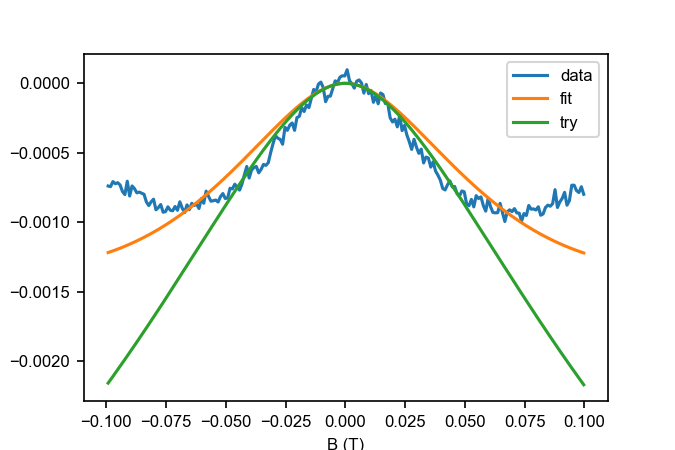

Text(0,0.5,'G ($2e^2/h$)')

In [102]:
plt.figure()
plt.plot(B_sub,G_sub, label='data')
plt.plot(B_sub, DG_clean(B_sub, a[0], a[1], a[2], a[3]), label='fit')
plt.plot(B_sub, DG_clean(B_sub, 0.003e-7, 2e-7, 100e-9, 10), label='try')
plt.legend()
plt.xlabel('B (T)')
plt.ylabel(r'G ($2e^2/h$)')

### Dirty formula

In [12]:
def DG(B_sub, l_so, l_phi, D):
    B_sub[B_sub==0] = 1e-9
    w = 100e-9
    l_m = np.sqrt(h_bar/e/abs(B_sub))
    tau_b = 3*l_m**4/w**2/D
    l_b = np.sqrt(D*tau_b)
    L = 9e-6
    dg = -1/L*(3/2*(1/l_phi**2 + 4/3/l_so**2 + 1/l_b**2)**(-0.5) - 0.5*(1/l_phi**2 + 1/l_b**2)**(-0.5))
    dg-=max(dg)
    return dg

In [13]:
#G_off = G_sub-max(G_sub)
a,b = spy.curve_fit(DG, B_sub, G_sub, maxfev=100000, p0=[50e-9, 1e-6, 0.012], ftol=1e-9, xtol=1e-9,
                   method='trf', bounds=(0, [1e4, 1e-4, 1e2]))
                    #, bounds=(1e-12,1) method='lm' x_scale='jac' bounds=(100e-9,1) ,p0=[400e-9,1e-6,0.012]

In [14]:
a

array([1.17435652e-07, 2.09070749e-07, 2.50075575e-01])

In [249]:
b

array([[1.68401558e-18, 1.62601189e-18, 3.27885269e-34],
       [1.62601189e-18, 1.63412292e-18, 3.29520857e-34],
       [3.27885269e-34, 3.29520857e-34, 6.64478748e-50]])

In [250]:
np.sqrt(h/e*0.1)

2.033275003768259e-08

<IPython.core.display.Javascript object>


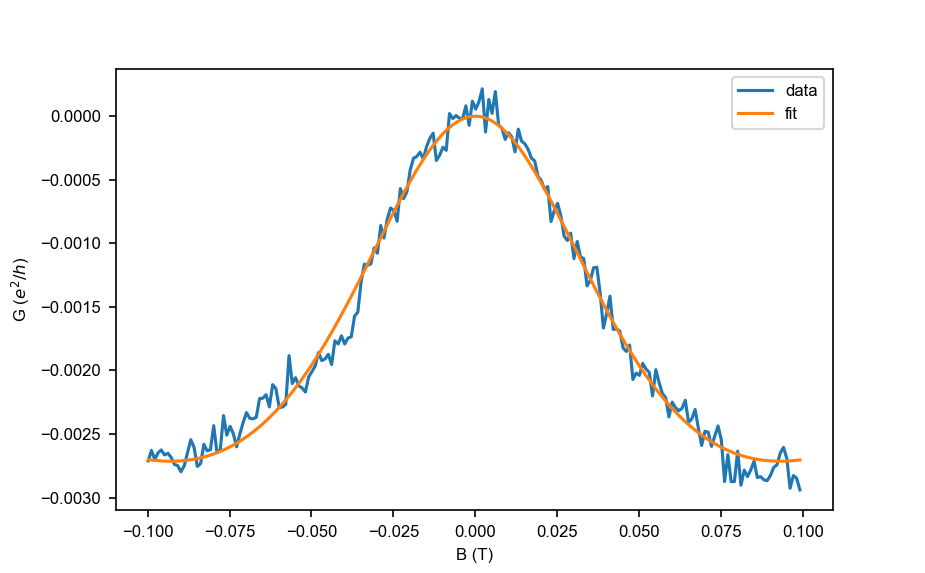

Text(0,0.5,'G ($e^2/h$)')

In [15]:
fig = plt.figure()
#fig.text(0,0,str(a))
plt.plot(B_sub,G_sub, label='data')
plt.plot(B_sub, DG(B_sub, a[0], a[1], a[2]), label='fit')
#plt.plot(B_sub, DG(B_sub, 100e-9, 3e-7, 12), label='fit')
plt.legend()
plt.xlabel('B (T)')
plt.ylabel(r'G ($e^2/h$)')

In [11]:
np.sqrt(h_bar/e/0.05)

1.1471525776140767e-07

<IPython.core.display.Javascript object>


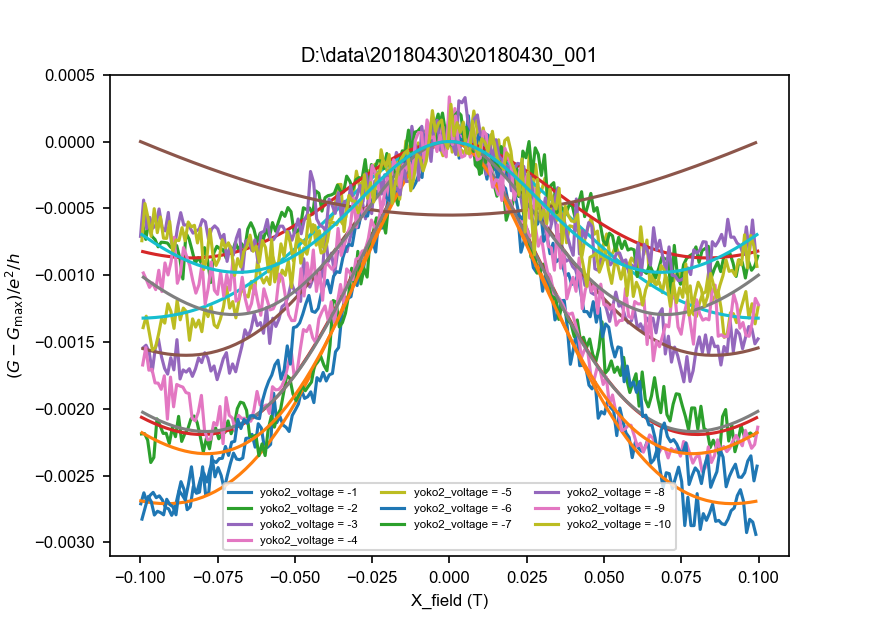

0.0038595620752783135 0.44990565139049493
0.004633026253335448 0.42545120130442066
0.0031578652769767165 0.4017983246260338
0.00024567752554576226 0.38530610480978644
0.0011033991620291678 0.36637143899020347
0.0044695837207165325 0.3520782134143334
0.006246840107287657 0.3353078171132373
0.0019470703699014458 0.3228189244134884
0.004036293479786414 0.3132326699052053
0.0015132603105091687 0.3008658030815101


In [84]:
plt.figure()
p=[]
for k in [-1,-2,-3,-4,-5,-6,-7,-8,-9,-10]:
    B_sub,G_sub = curr2cond_2D(dat, 'AMI430_x_field', 'current', 15e3, 0.1, 'yoko2_voltage', k)
    a,b = spy.curve_fit(DG, B_sub, G_sub, maxfev=100000, p0=[50e-9,5e-7, 0.012],
                                 ftol=1e-9, xtol=1e-9, method='trf', bounds=(1e-9,10))
    plt.plot(B_sub, DG(B_sub, a[0], a[1], a[2]))#, label='fit')
    
    p.append(a)


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

<IPython.core.display.Javascript object>


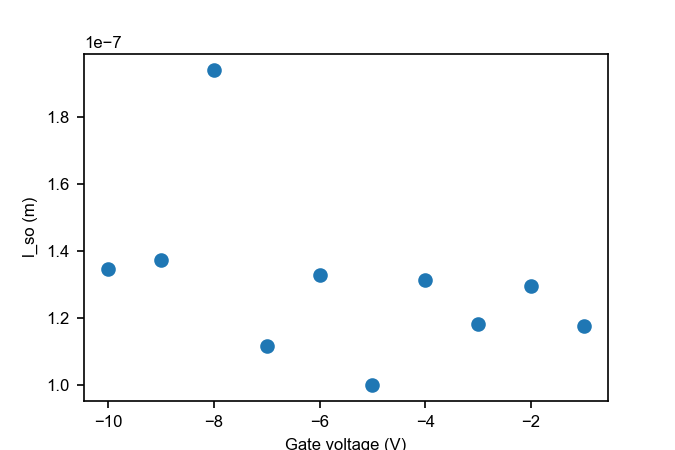

<IPython.core.display.Javascript object>


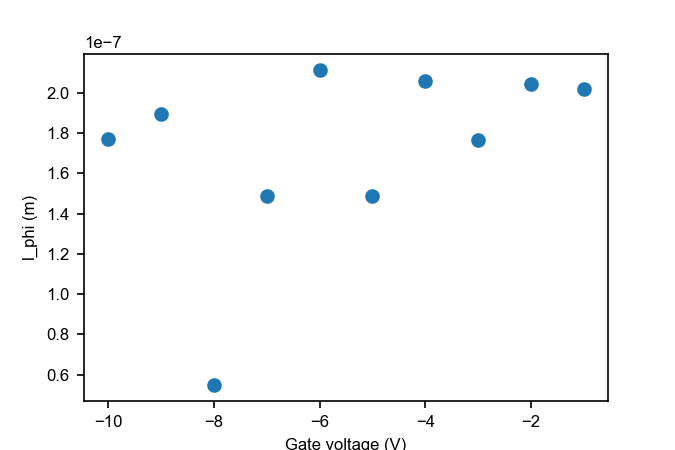

<IPython.core.display.Javascript object>


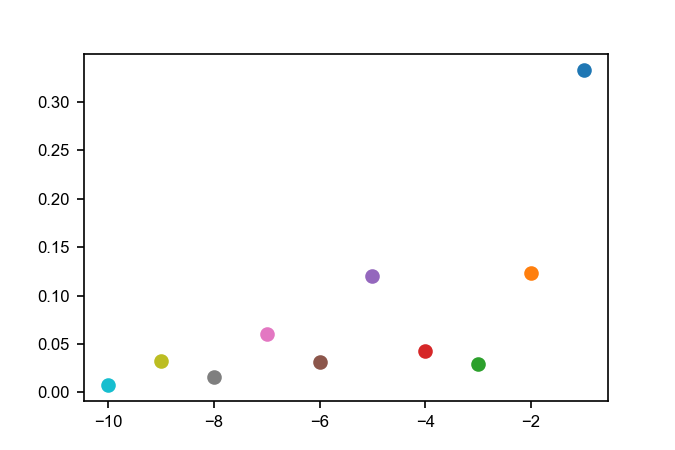

In [85]:
plt.figure('Spin orbit length')
V_g = np.linspace(-1,-10,10)
a_so = []
a_phi = []
for k in range(10):
    a_so.append(p[k][0])
    #plt.plot(Vg[k],p[k][0], )

plt.plot(V_g, a_so, 'o')
plt.xlabel('Gate voltage (V)')
plt.ylabel('l_so (m)')    
    
plt.figure('Phase coherence length')
for k in range(10):
    a_phi.append(p[k][1])
    #plt.plot(Vg[k],p[k][1])
plt.plot(V_g, a_phi, 'o')
plt.xlabel('Gate voltage (V)')
plt.ylabel('l_phi (m)') 

plt.figure()
for k in range(10):
    plt.plot(V_g[k],p[k][2], 'o')

In [328]:
a_so

[9.625251725248017e-08,
 1.5750913962349758e-07,
 1.2042513860102066e-07,
 1.3264576791333102e-07,
 1.2141546190276746e-07]

In [280]:
p.

AttributeError: 'list' object has no attribute 'flat'

### 0deg80nm

In [18]:
a1,b1 = spy.curve_fit(DG, B_sub1, G_sub1, maxfev=100000, p0=[50e-9,5e-7, 0.012], ftol=1e-9, xtol=1e-9,
                   method='trf', bounds=(1e-9,10)) #

In [19]:
a1

array([1.41348650e-07, 2.06832499e-07, 3.11044237e-02])

<IPython.core.display.Javascript object>


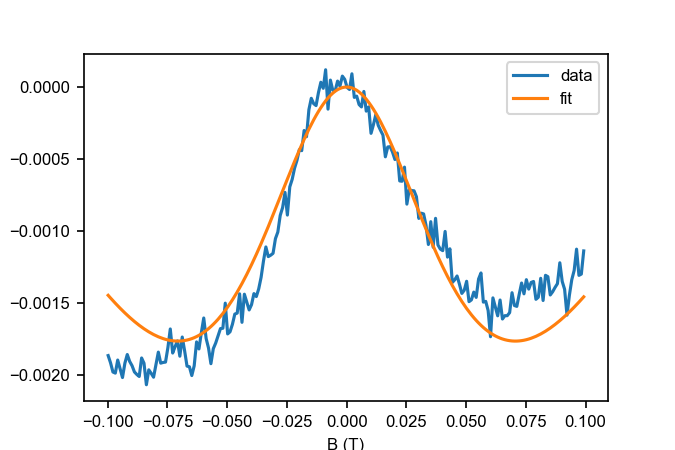

Text(0,0.5,'G ($e^2/h$)')

In [20]:
fig = plt.figure()
#fig.text(0,0,str(a))
plt.plot(B_sub1,G_sub1, label='data')
plt.plot(B_sub1, DG(B_sub1, a1[0], a1[1], a1[2]), label='fit')
#plt.plot(B_sub, DG(B_sub, 100e-9, 3e-7, 12), label='fit')
plt.legend()
plt.xlabel('B (T)')
plt.ylabel(r'G ($e^2/h$)')

In [22]:
a2,b2 = spy.curve_fit(DG, B_sub2, G_sub2, maxfev=100000, p0=[50e-9,5e-7, 0.012], ftol=1e-9, xtol=1e-9,
                   method='trf', bounds=(1e-9,10))

In [23]:
a2

array([1.80810844e-07, 2.46584266e-07, 5.48668405e-03])

<IPython.core.display.Javascript object>


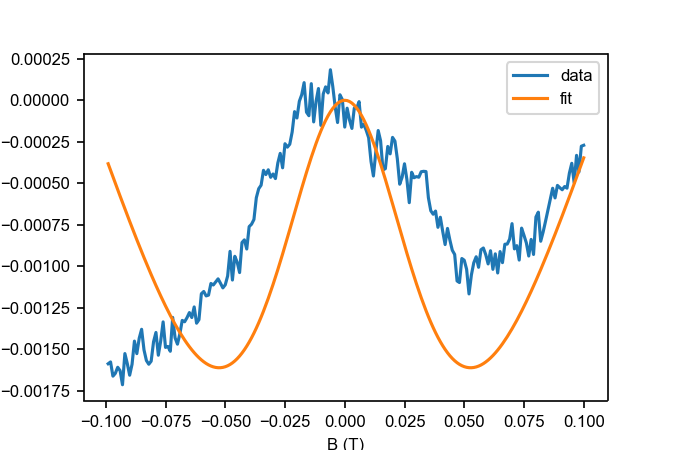

Text(0,0.5,'G ($e^2/h$)')

In [24]:
fig = plt.figure()
#fig.text(0,0,str(a))
plt.plot(B_sub2,G_sub2, label='data')
plt.plot(B_sub2, DG(B_sub2, a2[0], a2[1], a2[2]), label='fit')
#plt.plot(B_sub, DG(B_sub, 100e-9, 3e-7, 12), label='fit')
plt.legend()
plt.xlabel('B (T)')
plt.ylabel(r'G ($e^2/h$)')

[1.35918667e-07 1.80883157e-07 3.56769870e-03]


<IPython.core.display.Javascript object>


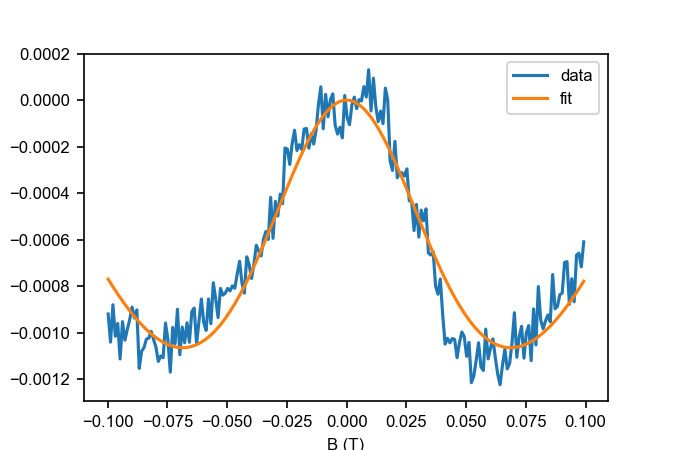

Text(0,0.5,'G ($e^2/h$)')

In [25]:
a3,b3 = spy.curve_fit(DG, B_sub3, G_sub3, maxfev=100000, p0=[50e-9,5e-7, 0.012], ftol=1e-9, xtol=1e-9,
                   method='trf', bounds=(1e-9,10))

print(a3)

fig = plt.figure()
#fig.text(0,0,str(a))
plt.plot(B_sub3,G_sub3, label='data')
plt.plot(B_sub3, DG(B_sub3, a3[0], a3[1], a3[2]), label='fit')
#plt.plot(B_sub, DG(B_sub, 100e-9, 3e-7, 12), label='fit')
plt.legend()
plt.xlabel('B (T)')
plt.ylabel(r'G ($e^2/h$)')

In [31]:
a4,b4 = spy.curve_fit(DG, B_sub4, G_sub4, maxfev=100000, p0=[50e-9,5e-7, 0.012], ftol=1e-9, xtol=1e-9,
                   method='trf', bounds=(1e-9,10))

print(a4)

fig = plt.figure()
#fig.text(0,0,str(a))
plt.plot(B_sub4,G_sub4, label='data')
plt.plot(B_sub4, DG(B_sub4, a4[0], a4[1], a4[2]), label='fit')
#plt.plot(B_sub, DG(B_sub, 100e-9, 3e-7, 12), label='fit')
plt.legend()
plt.xlabel('B (T)')
plt.ylabel(r'G ($e^2/h$)')

TypeError: unsupported operand type(s) for /: 'float' and 'list'

[1.39086613e-07 1.59301788e-07 2.49795262e-01]


<IPython.core.display.Javascript object>


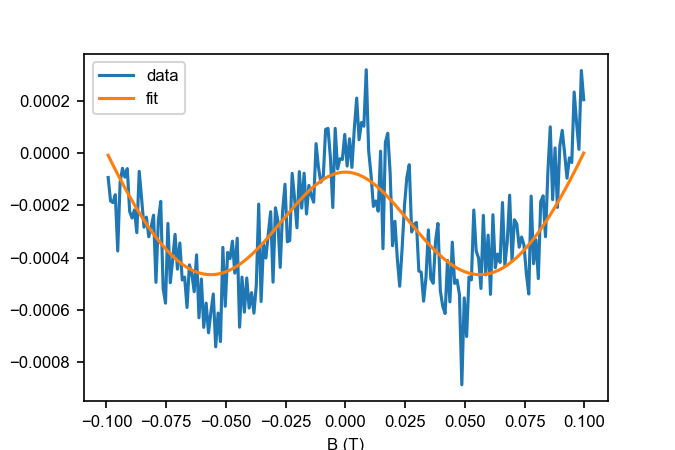

Text(0,0.5,'G ($e^2/h$)')

In [27]:
#G_sub5 = savitzky_golay(G_sub5, 25, 3)
a5,b5 = spy.curve_fit(DG, B_sub5, G_sub5, maxfev=100000, p0=[50e-9,5e-7, 0.012], ftol=1e-9, xtol=1e-9,
                   method='trf', bounds=(1e-9,10))

print(a5)

fig = plt.figure()
#fig.text(0,0,str(a))
plt.plot(B_sub5,G_sub5, label='data')
plt.plot(B_sub5, DG(B_sub5, a5[0], a5[1], a5[2]), label='fit')
#plt.plot(B_sub, DG(B_sub, 100e-9, 3e-7, 12), label='fit')
plt.legend()
plt.xlabel('B (T)')
plt.ylabel(r'G ($e^2/h$)')

<IPython.core.display.Javascript object>


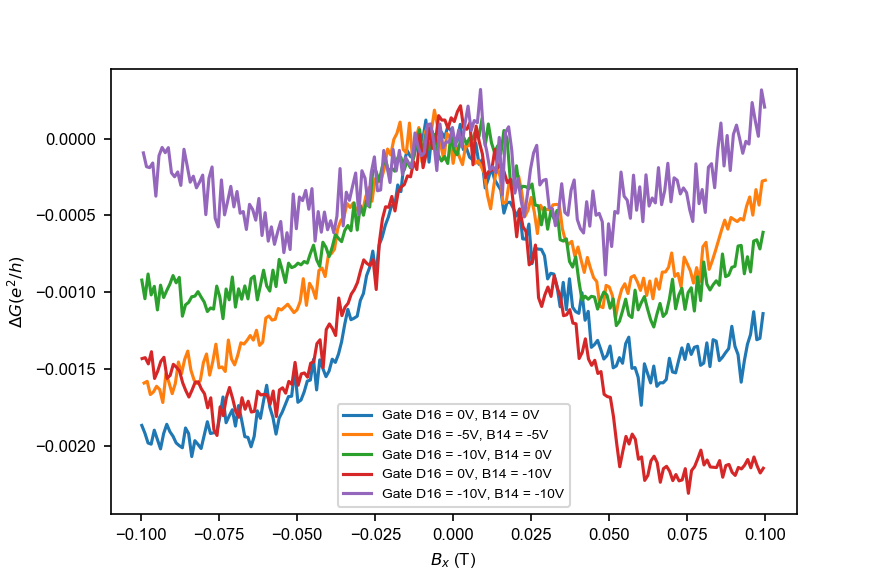

Text(0,0.5,'$\\Delta G (e^2/h)$')

In [28]:
plt.figure()
plt.plot(B_sub1,G_sub1, label='Gate D16 = 0V, B14 = 0V')
plt.plot(B_sub2,G_sub2, label='Gate D16 = -5V, B14 = -5V')
plt.plot(B_sub3,G_sub3, label='Gate D16 = -10V, B14 = 0V')
plt.plot(B_sub4,G_sub4, label='Gate D16 = 0V, B14 = -10V')
plt.plot(B_sub5,G_sub5, label='Gate D16 = -10V, B14 = -10V')
plt.legend(fontsize='small')
plt.xlabel(r'$B_x$ (T)')
plt.ylabel(r'$\Delta G (e^2/h)$')

<IPython.core.display.Javascript object>


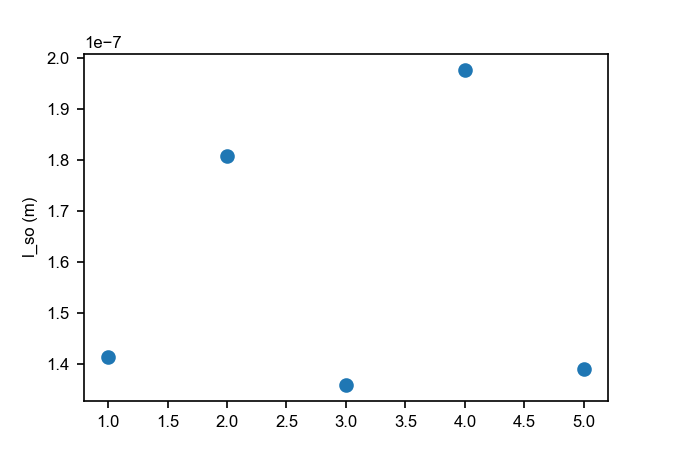

[1.4134865035730389e-07,
 1.8081084422748405e-07,
 1.35918666644382e-07,
 1.9774687228074837e-07,
 1.390866130743211e-07]

In [29]:
plt.figure()
l =[a1[0], a2[0], a3[0], a4[0], a5[0]]
e = [1,2,3,4,5]
plt.plot(e,l, 'o')
plt.ylabel('l_so (m)')
l

<IPython.core.display.Javascript object>


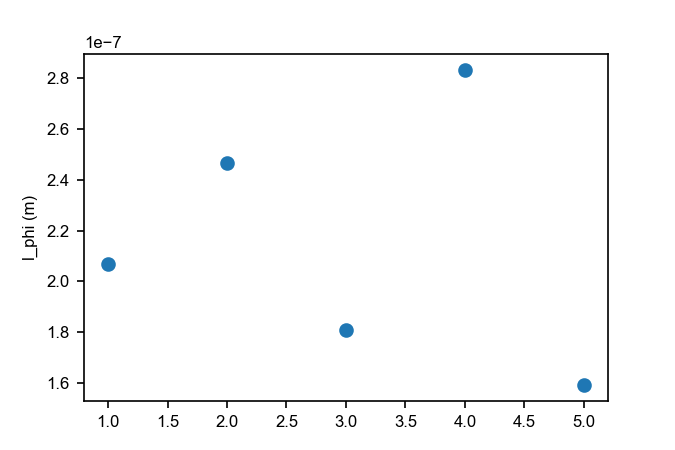

[2.0683249879812896e-07,
 2.4658426605838386e-07,
 1.8088315658716615e-07,
 2.8340421082110763e-07,
 1.5930178764110214e-07]

In [30]:
plt.figure()
l =[a1[1], a2[1], a3[1], a4[1], a5[1]]
e = [1,2,3,4,5]
plt.plot(e,l, 'o')
plt.ylabel('l_phi (m)')
l

In [ ]:
def DG(B_sub, l_so, l_phi, D):
    '''
    Dong Liang paper
    '''
    B_sub[B_sub==0] = 1e-9
    w = 100e-9
    #l_b = np.sqrt(3*h_bar/e*w*abs(B_sub))
    l_m = np.sqrt(h_bar/e/abs(B_sub))
    tau_b = 3*l_m**4/w**2/D
    l_b = np.sqrt(D*tau_b)
    L = 8e-6
    dg = -1/L*(3/2*(1/l_phi**2 + 4/3/l_so**2 + 1/l_b**2)**(-0.5) - 0.5*(1/l_phi**2 + 1/l_b**2)**(-0.5))
    return dg

In [25]:
1/36e3/(2*e**2/h)

0.35842412617464403

In [66]:
1.412e-7/10e-3/(2*e**2/h)

0.18219415181709503

In [68]:
10e-3/1.412e-7

70821.5297450425

In [42]:
def savitzky_golay(y, window_size, order, deriv=0, rate=1):
    r"""Smooth (and optionally differentiate) data with a Savitzky-Golay filter.
    The Savitzky-Golay filter removes high frequency noise from data.
    It has the advantage of preserving the original shape and
    features of the signal better than other types of filtering
    approaches, such as moving averages techniques.
    Parameters
    ----------
    y : array_like, shape (N,)
        the values of the time history of the signal.
    window_size : int
        the length of the window. Must be an odd integer number.
    order : int
        the order of the polynomial used in the filtering.
        Must be less then `window_size` - 1.
    deriv: int
        the order of the derivative to compute (default = 0 means only smoothing)
    Returns
    -------
    ys : ndarray, shape (N)
        the smoothed signal (or it's n-th derivative).
    Notes
    -----
    The Savitzky-Golay is a type of low-pass filter, particularly
    suited for smoothing noisy data. The main idea behind this
    approach is to make for each point a least-square fit with a
    polynomial of high order over a odd-sized window centered at
    the point.
    Examples
    --------
    t = np.linspace(-4, 4, 500)
    y = np.exp( -t**2 ) + np.random.normal(0, 0.05, t.shape)
    ysg = savitzky_golay(y, window_size=31, order=4)
    import matplotlib.pyplot as plt
    plt.plot(t, y, label='Noisy signal')
    plt.plot(t, np.exp(-t**2), 'k', lw=1.5, label='Original signal')
    plt.plot(t, ysg, 'r', label='Filtered signal')
    plt.legend()
    plt.show()
    References
    ----------
    .. [1] A. Savitzky, M. J. E. Golay, Smoothing and Differentiation of
       Data by Simplified Least Squares Procedures. Analytical
       Chemistry, 1964, 36 (8), pp 1627-1639.
    .. [2] Numerical Recipes 3rd Edition: The Art of Scientific Computing
       W.H. Press, S.A. Teukolsky, W.T. Vetterling, B.P. Flannery
       Cambridge University Press ISBN-13: 9780521880688
    """
    import numpy as np
    from math import factorial

    try:
        window_size = np.abs(np.int(window_size))
        order = np.abs(np.int(order))
    except ValueError:
        raise ValueError("window_size and order have to be of type int")
    if window_size % 2 != 1 or window_size < 1:
        raise TypeError("window_size size must be a positive odd number")
    if window_size < order + 2:
        raise TypeError("window_size is too small for the polynomials order")
    order_range = range(order+1)
    half_window = (window_size -1) // 2
    # precompute coefficients
    b = np.mat([[k**i for i in order_range] for k in range(-half_window, half_window+1)])
    m = np.linalg.pinv(b).A[deriv] * rate**deriv * factorial(deriv)
    # pad the signal at the extremes with
    # values taken from the signal itself
    firstvals = y[0] - np.abs( y[1:half_window+1][::-1] - y[0] )
    lastvals = y[-1] + np.abs(y[-half_window-1:-1][::-1] - y[-1])
    y = np.concatenate((firstvals, y, lastvals))
    return np.convolve( m[::-1], y, mode='valid')

In [134]:
G_sub = savitzky_golay(G_sub, 21, 3)

<IPython.core.display.Javascript object>


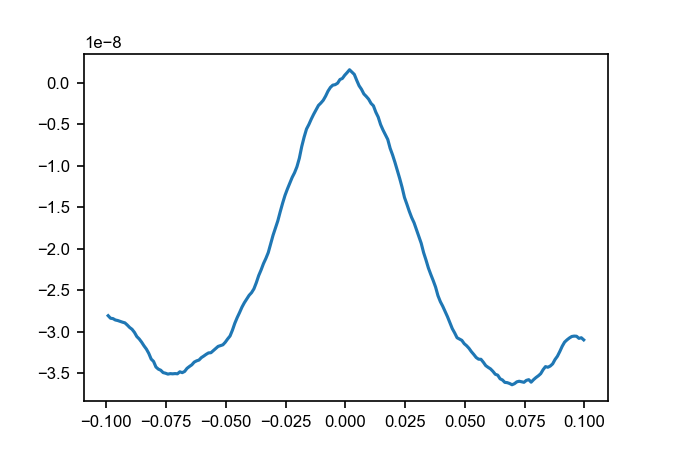

In [135]:
plt.figure()
plt.plot(B_sub, G_sub)